# Prediction using supervised ML 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## First, let's load the data into a programming environment


In [4]:
data = pd.read_csv("studentData.csv")
print(data)

    hours  scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## we can visualize the data using a scatter plot to see if there is any correlation between the hours studied and the scores 


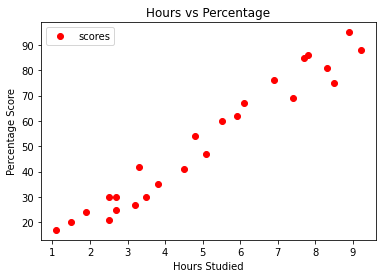

In [5]:
data.plot(x='hours', y='scores', style = 'o',color="red")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## we can split the data into training and testing sets using scikit-learn's train_test_split function:


In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## We can then train a simple linear regression model on the training set


In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


## Plotting the regression line


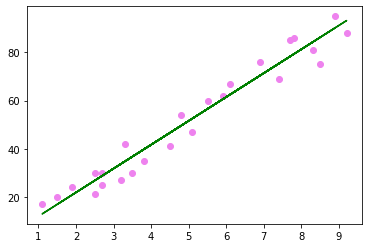

In [8]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color="violet")
plt.plot(X, line,color="green");
plt.show()

## We can then make predictions on the testing set and compare them to the actual values


In [9]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


## Finally, we can use the model to make a prediction for a student who studies for 9.25 hours per day


In [10]:
hours = 9.25
pred = regressor.predict([[hours]])
print("Predicted score for {} hours of studying: {:.2f}%".format(hours, pred[0]))


Predicted score for 9.25 hours of studying: 93.69%
